In [11]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_mushrooms():
    return pd.read_csv("mushrooms.csv")

In [12]:
df_mush = load_mushrooms()
print(df_mush.columns)
df_mush

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [13]:
df_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<AxesSubplot:xlabel='gill-color', ylabel='count'>

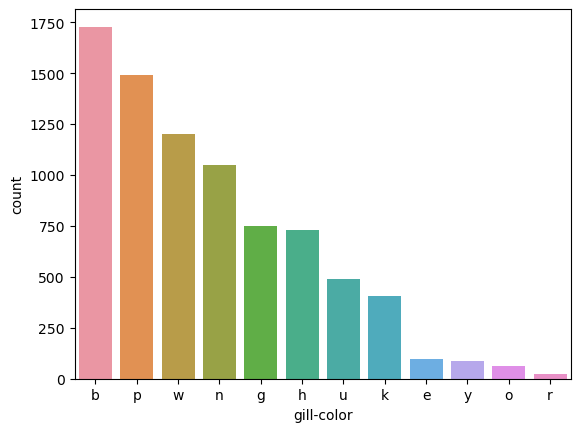

In [32]:
#TODO Make statcked barcharts for all categories for visualization
import seaborn as sns
sns.countplot(data=df_mush, x='gill-color', order=df_mush['gill-color'].value_counts().index)

It looks like there are no unique veil-types in the data set we will make a copy of the dataframe and drop column. We also be sure that all columns have at least 2 unique values at the same time. we also separate the target variable from the data.

In [14]:
df_mush_reduced = df_mush.copy()
for col in df_mush_reduced.columns:
    if len(df_mush_reduced[col].unique())  == 1:
        df_mush_reduced = df_mush_reduced.drop(col, axis=1)
target = df_mush_reduced['class']
df_mush_reduced = df_mush_reduced.drop(['class'], axis=1)
df_mush_reduced

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,s,k,w,w,w,o,e,w,v,l


In [15]:
df_mush_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [16]:
#FIXME get the 4x5 plots showing
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(4,4))

row = 0
col = 0

for indx, category in enumerate(df_mush_reduced):
    row = indx // 4
    col = indx % 5
    sns

SyntaxError: invalid syntax (1331877566.py, line 8)

so it looks like these are all objects so we will have to encode all of these columns except class we will let sklearn deal with. now that our explo we will seperate the target, `class` in this case, from the data and do one hot encoding on each variable. 

In [1]:
#TODO OneHotEncode all data columns
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

ohe

OneHotEncoder(handle_unknown='ignore')